# REAL ESTATE HOUSING ANALYSIS 

## Business Understanding

### Objectives


1.	To examine the relationship between the price of a house and its features, such as number of bedrooms, sqft, bathroom, floors and condition.

2.	To identify the factors that influence the price of a house and to develop a predictive model based on the features of the house.

3.	To evaluate the impact of house condition on the price and to determine the optimal level of renovation for maximizing the return on investment.

4.	To explore the preferences and satisfaction of buyers and sellers regarding the features of the house, such as number of bedrooms, sqft, bathroom, floors and condition.

5.	To compare price average with the Year of construction

### Problem statement 
The aim of this research is to take on the challenging task of understanding  variables that govern the dynamics of the real estate 

market. The goal is to discover hidden patterns, identify major trends, and build meaningful links between numerous variables that 

influence the real estate market by looking into the huge housing dataset of kc_housing. This thorough examination will not only look

 at variables directly related to property characteristics but will also take location, property conditions, and market conditions 
 
 into account. Our ultimate goal is to offer insightful information to a wide range of stakeholders, such as homeowners, real estate 
 
 firms, and investors, to help them make wise choices in the dynamic real estate market.





# Data understanding


The dataset contains information related to various houses, with each row representing a unique property. The columns include details 

such as price, the number of bedrooms and bathrooms, square footage of living space, lot size, number of floors, waterfront status, 

view, condition, grade, square footage of the above and basement levels, year built, year renovated, location (zip code, latitude, 

longitude), and square footage of nearby living space.

Explanatory data analysis techniques will be used to get clear understanding of the dataset including

handling missing values, checking data types, identifying outliers and placeholder values

and also extracting relevant features for analysis.

In [2]:
# import valid libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
# loading the dataset
data = pd.read_csv("kc_house_data.csv", index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape


(21597, 20)

## Data Preparation

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [26]:
# checking for the missing values
def check_missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values.to_dict()



In [27]:
missing_values = check_missing_values(data)
missing_values

{'date': 0,
 'price': 0,
 'bedrooms': 0,
 'bathrooms': 0,
 'sqft_living': 0,
 'sqft_lot': 0,
 'floors': 0,
 'waterfront': 2376,
 'view': 63,
 'condition': 0,
 'grade': 0,
 'sqft_above': 0,
 'sqft_basement': 0,
 'yr_built': 0,
 'yr_renovated': 3842,
 'zipcode': 0,
 'lat': 0,
 'long': 0,
 'sqft_living15': 0,
 'sqft_lot15': 0}

In [28]:
# dropping columns not needed for study
def drop_columns(data, columns_to_drop):
    data = data.drop(columns=columns_to_drop)
    return data

#  specify columns to drop
columns_to_drop = ["date","sqft_living","view", "sqft_above", "sqft_basement","lat","zipcode", "long","sqft_living15", "sqft_lot15","yr_renovated"]

# calling the function

data = drop_columns(data,columns_to_drop)
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,NaN,Average,7 Average,1955
6414100192,538000,3,2.25,7242,2.0,NO,Average,7 Average,1951
5631500400,180000,2,1.00,10000,1.0,NO,Average,6 Low Average,1933
2487200875,604000,4,3.00,5000,1.0,NO,Very Good,7 Average,1965
1954400510,510000,3,2.00,8080,1.0,NO,Average,8 Good,1987


# Data Analysis

In [29]:
data= data[["price","bedrooms","bathrooms","sqft_lot","floors","yr_built","condition","grade"]].copy()
data

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition,grade
id,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,1955,Average,7 Average
6414100192,538000,3,2.25,7242,2.0,1951,Average,7 Average
5631500400,180000,2,1.00,10000,1.0,1933,Average,6 Low Average
2487200875,604000,4,3.00,5000,1.0,1965,Very Good,7 Average
1954400510,510000,3,2.00,8080,1.0,1987,Average,8 Good
...,...,...,...,...,...,...,...,...
263000018,360000,3,2.50,1131,3.0,2009,Average,8 Good
6600060120,400000,4,2.50,5813,2.0,2014,Average,8 Good
1523300141,402101,2,0.75,1350,2.0,2009,Average,7 Average


In [30]:
data.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,1.509941e+04,1.494096,1970.999676
std,3.673681e+05,0.926299,0.768984,4.141264e+04,0.539683,29.375234
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,1.068500e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,2015.000000


In [31]:
data.corr()["price"]

price        1.000000
bedrooms     0.308787
bathrooms    0.525906
sqft_lot     0.089876
floors       0.256804
yr_built     0.053953
Name: price, dtype: float64

In [32]:
""" to examine the relationship between the price of a house and its features, 
such as number of bedrooms, sqft, bathroom, floors and condition,
 you can use *linear regression* as a statistical technique to model how the features affect the price
"""
# 
import statsmodels.api as staticmethod

y = data["price"]
X = data.drop('price', axis=1)
data.head()

#model= data.OLS(y, X)
#model

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition,grade
id,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,1955,Average,7 Average
6414100192,538000,3,2.25,7242,2.0,1951,Average,7 Average
5631500400,180000,2,1.00,10000,1.0,1933,Average,6 Low Average
2487200875,604000,4,3.00,5000,1.0,1965,Very Good,7 Average
1954400510,510000,3,2.00,8080,1.0,1987,Average,8 Good


In [33]:
# ols  model 
import statsmodels.api as sm

model = sm.OLS(data["price"], sm.add_constant(data[["bedrooms","floors","yr_built","bathrooms","sqft_lot"]])).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     2281.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:13:08   Log-Likelihood:            -3.0281e+05
No. Observations:               21597   AIC:                         6.056e+05
Df Residuals:                   21591   BIC:                         6.057e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.523e+06   1.63e+05     46.053      0.0

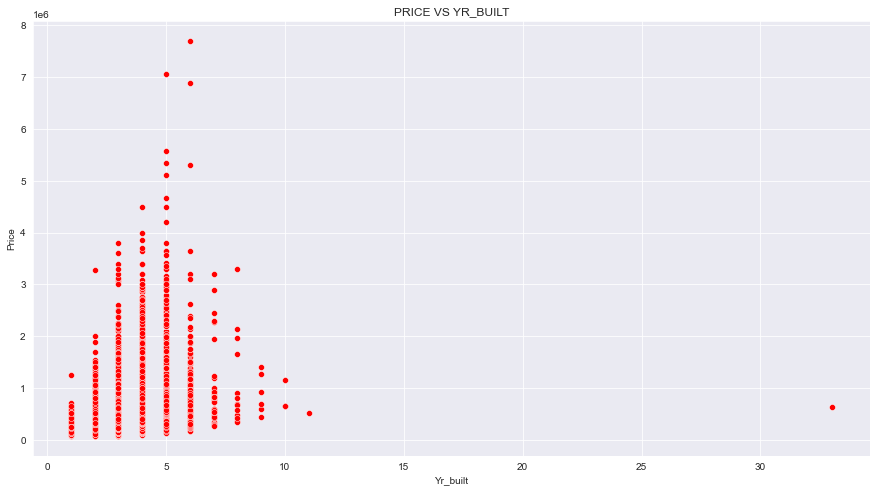

In [34]:
# Visualization of price againsta yr_built

plt.figure(figsize=(15,8))

sns.scatterplot(y=data["price"], x=data["bedrooms"], color= "red")
plt.ylabel("Price")
plt.xlabel("Yr_built")
plt.title("PRICE VS YR_BUILT")


plt.show()

In [36]:
data.head(3)

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition,grade
id,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,1955,Average,7 Average
6414100192,538000,3,2.25,7242,2.0,1951,Average,7 Average
5631500400,180000,2,1.00,10000,1.0,1933,Average,6 Low Average


In [37]:
# checking for value counts in grade column
data["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [38]:
# checking for value counts in condition column

data["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [49]:
# converting the categorical data in condition and grade column to numerical data by hot encoding.

encoded_data = pd.get_dummies(data, columns=["condition", "grade"])
encoded_data.head(3)

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,1955,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,538000,3,2.25,7242,2.0,1951,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5631500400,180000,2,1.00,10000,1.0,1933,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#summary statistics for the encoded data    

encoded_data.describe()


,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,1.509941e+04,1.494096,1970.999676,0.649164,0.007871,0.262861,0.001343,...,0.018475,0.004121,0.000602,0.000046,0.001250,0.011205,0.094365,0.415521,0.280826,0.121082
std,3.673681e+05,0.926299,0.768984,4.141264e+04,0.539683,29.375234,0.477243,0.088373,0.440198,0.036620,...,0.134664,0.064064,0.024528,0.006805,0.035337,0.105263,0.292343,0.492823,0.449413,0.326230
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,1975.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,1.068500e+04,2.000000,1997.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,2015.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


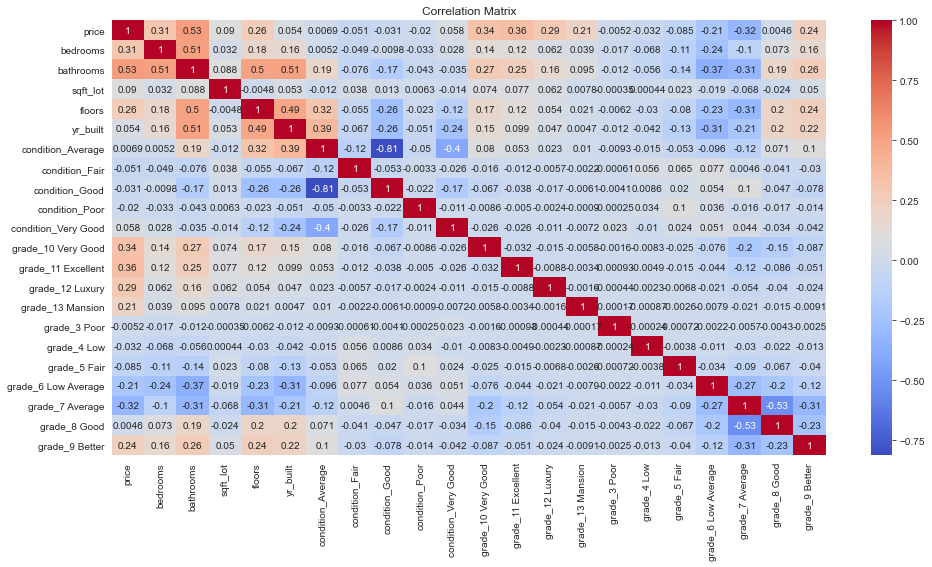

In [44]:
#correlation matrix to check for relationships between variables
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [52]:
encoded_data.head(2)

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.00,5650,1.0,1955,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,538000,3,2.25,7242,2.0,1951,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


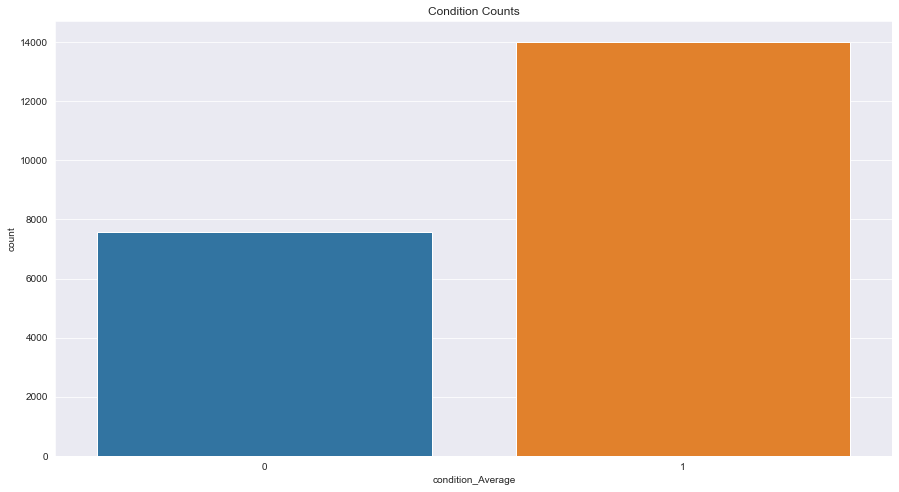

In [57]:

plt.figure(figsize=(15,8))

sns.countplot(x='condition_Average', data=encoded_data)
plt.title("Condition Counts")
plt.show()
